# With quantstats

We support and recommend [quantstats](https://github.com/ranaroussi/quantstats)

In [1]:
import pandas as pd

pd.options.plotting.backend = 'plotly'

import quantstats as qs

from cvx.simulator.builder import builder

In [2]:
prices = pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True) 

In [3]:
capital = 1e6

In [4]:
b = builder(prices=prices, initial_cash=capital)

In [5]:
for t, state in b:
    # each day we invest a quarter of the capital in the assets
    b[t[-1]] = (1.0 / len(b.assets)) * state.nav / state.prices

In [6]:
portfolio= b.build()

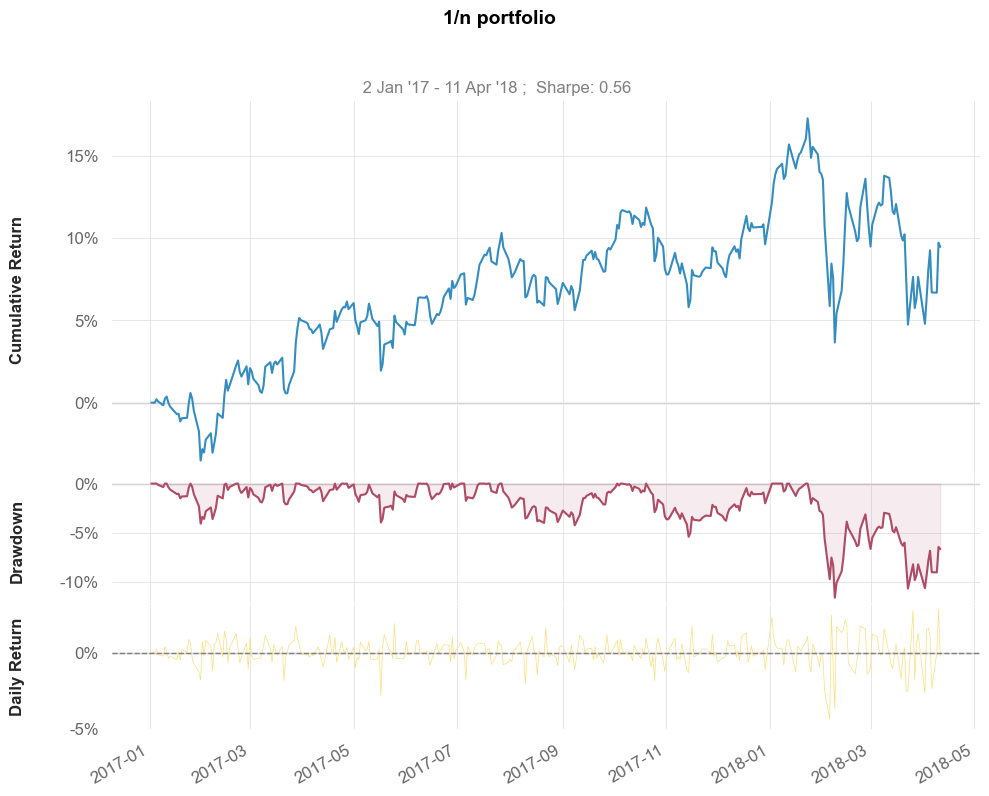

In [7]:
qs.plots.snapshot(portfolio.nav, title="1/n portfolio", show=True)

In [8]:
# show sharpe ratio
print(qs.stats.sharpe(portfolio.nav.pct_change()))
print(qs.stats.sharpe(portfolio.nav.pct_change().dropna()))
print(qs.stats.sharpe(portfolio.nav))

0.5646278826409189
0.5655105330739049
0.5646278826409189
